#Description

For this approach we used the WRDS dataset. To embed the descriptions, we utilize a sentence transformer, specifically the 'all-mpnet-base-v2' model. The descriptions of the companies were divided by sectors in lists and every list was embedded using this transformer. We utilized t-SNE for visualizing every sector.

#Preprocessing the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("/content/drive/MyDrive/companyclassification/datasets/wrds_data.csv")
data.head()

,Unnamed: 0,conm,gind,gsector,naics,busdesc,spcindcd,GICS_Sector,naics_main,NAICS_Sector
0,2,AAI CORP,NaN,NaN,NaN,"AAI Corporation, together with its subsidiarie...",230.0,NaN,No,NaN
1,3,A.A. IMPORTING CO INC,255040.0,25.0,442110.0,"A.A. Importing Company, Inc. designs, manufact...",449.0,Consumer Discretionary,44,Retail Trade
2,4,AAR CORP,201010.0,20.0,423860.0,AAR Corp. provides products and services to co...,110.0,Industrials,42,Wholesale Trade
3,5,A.B.A. INDUSTRIES INC,NaN,NaN,NaN,A.B.A. Industries Inc. was acquired by McSwain...,110.0,NaN,No,NaN
4,6,ABC INDS INC,NaN,NaN,NaN,"ABC Industries, Inc. manufactures and supplies...",415.0,NaN,No,NaN


In [7]:
data.dropna(subset=['gind'], how='any', inplace=True)

In [8]:
data['gind'] = data['gind'].astype(int)

In [9]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=0ff96126a29a7fc51a058cf1ade639c074c80ba3fc9875da9100b5efae67d362
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


#Dividing the sectors

In [10]:
import math

energy = []
materials = []
industrials = []
consumer_discretionaty = []
consumer_staples = []
health_care = []
financials = []
information_technology = []
communication_services = []
utilities = []
real_estate = []

gics = list(data["gind"])
desc = list(data["busdesc"])

for i in range(len(gics)):
  if math.floor(gics[i] / 10000) == 10:
    energy.append(desc[i])
  if math.floor(gics[i] / 10000) == 15:
    materials.append(desc[i])
  if math.floor(gics[i] / 10000) == 20:
    industrials.append(desc[i])
  if math.floor(gics[i] / 10000) == 25:
    consumer_discretionaty.append(desc[i])
  if math.floor(gics[i] / 10000) == 30:
    consumer_staples.append(desc[i])
  if math.floor(gics[i] / 10000) == 35:
    health_care.append(desc[i])
  if math.floor(gics[i] / 10000) == 40:
    financials.append(desc[i])
  if math.floor(gics[i] / 10000) == 45:
    information_technology.append(desc[i])
  if math.floor(gics[i] / 10000) == 50:
    communication_services.append(desc[i])
  if math.floor(gics[i] / 10000) == 55:
    utilities.append(desc[i])
  if math.floor(gics[i] / 10000) == 60:
    real_estate.append(desc[i])

#Embedding the sentences

In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [12]:
energy_embeddings = model.encode(energy)
materials_embeddings = model.encode(materials)
industrials_embeddings = model.encode(industrials)
consumer_discretionaty_embeddings = model.encode(consumer_discretionaty)
consumer_staples_embeddings = model.encode(consumer_staples)
health_care_embeddings = model.encode(health_care)
financials_embeddings = model.encode(financials)
information_technology_embeddings = model.encode(information_technology)
communication_services_embeddings = model.encode(communication_services)
utilities_embeddings = model.encode(utilities)
real_estate_embeddings = model.encode(real_estate)

In [13]:
list_of_embeddings = [
    energy_embeddings,
    materials_embeddings,
    industrials_embeddings,
    consumer_discretionaty_embeddings,
    consumer_staples_embeddings,
    health_care_embeddings,
    financials_embeddings,
    information_technology_embeddings,
    communication_services_embeddings,
    utilities_embeddings,
    real_estate_embeddings
]

In [14]:
combined_embeddings = np.concatenate(list_of_embeddings, axis=0)

#Visualization

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', n_iter=3000)

tsne_results = tsne.fit_transform(combined_embeddings)

In [16]:
list_names = [
    "Energy",
    "Materials",
    "Industrials",
    "Consumer Discretionary",
    "Consumer Staples",
    "Health Care",
    "Financials",
    "Information Technology",
    "Communication Services",
    "Utilities",
    "Real Estate"
]

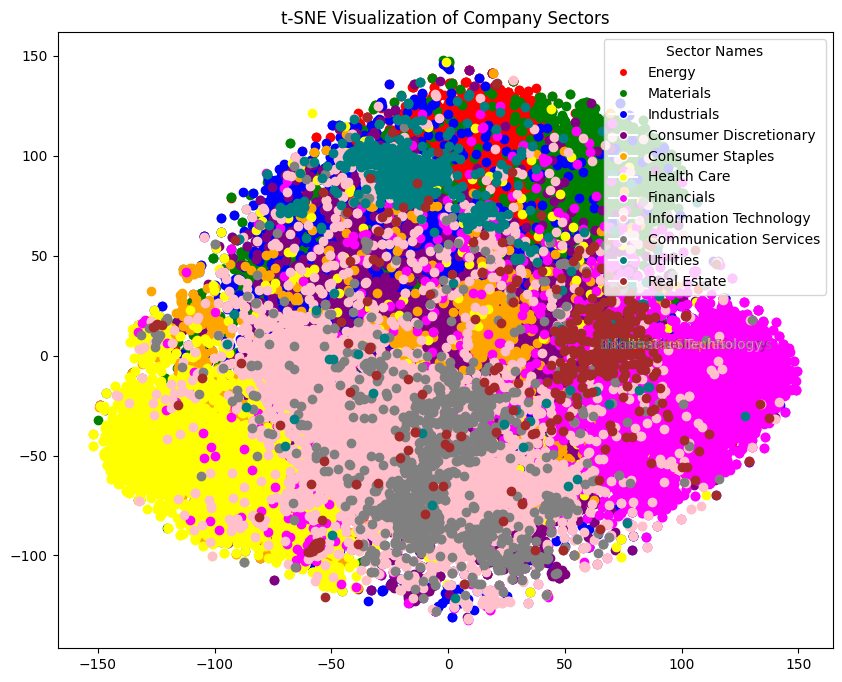

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'magenta', 'pink', 'gray', 'teal', 'brown']  # Custom colors for dots

start_index = 0
annotations = []

for i, embeddings in enumerate(list_of_embeddings):
    num_embeddings = embeddings.shape[0]
    plt.scatter(
        tsne_results[start_index : start_index + num_embeddings, 0],
        tsne_results[start_index : start_index + num_embeddings, 1],
        color=colors[i],
    )
    annotations.append(list_names[i])
    start_index += num_embeddings

for i, name in enumerate(list_names):
    annotation_x = np.median(tsne_results[start_index - num_embeddings : start_index, 0])
    annotation_y = np.median(tsne_results[start_index - num_embeddings : start_index, 1])
    plt.annotate(
        name,
        (annotation_x, annotation_y),
        color=colors[i],
        fontsize=10,
        alpha=0.7,
    )

plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=name) for i, name in enumerate(annotations)],
    loc='upper right',
    title='Sector Names',
)

plt.title("t-SNE Visualization of Company Sectors")
plt.show()
